In [52]:
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD
import tensorflow as tf
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
from multiprocessing import Process
from PIL import Image
import os.path
import multiprocessing
import time
import random
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

plt.style.use('ggplot')

%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\Cindy\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['resize', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [53]:
celebData=pd.read_csv('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Celebrity/list_attr_celeba.csv')

In [54]:
celebData['Male']

0        -1
1        -1
2         1
3        -1
4        -1
         ..
202594   -1
202595    1
202596    1
202597   -1
202598   -1
Name: Male, Length: 202599, dtype: int64

In [55]:
celebDataPart = pd.read_csv('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Celebrity/list_eval_partition.csv')

In [6]:
#May not be used for code, however just for reference this is Kaggle's recommendend partitions.
train_Data = celebData[0:162769]
test_Data = celebData[182637:202600]
validation_Data = celebData[162770:182636]
train=train.sample(frac=0.8,random_state=15)
validation=validation.sample(frac=0.1)

# Data Preparation

For this project, we will be using greyscaled and downscaled images of celebrities in order to build several models to categorize images by gender. We downloaded the data from kaggle.com, which contained 1GB of information mainly including 202,599 images of celebrities, and also a csv file that we will use later for labeling our images as male or female. We used the 'cv2' package and 'os' package to navigate our folder containing the images of the celebrities, and the argument 'cv2.IMREAD_GRAYSCALE' to convert each image to a grayscale np.array in order to input into our Convolutional Neural Networks and our logistic regression models. We then reshape each image with the specified imgsize. We used 50 and 100 to create 50x50 and 100x100 grayscale images. After, we changed the '-1' values indicating female for our data to '0' in order for the labels to work with our models.

Early in our work of the project, we stumbled upon a problem in which loading our data, even in grayscale, was a task that took very long to compute, and would have even taken long for the servers provided for us. We discovered that downscaling our images was the technique that would aid in the problem of long computations for creating our matrices of greyscale converted images. 

Populating the interactive namespace from numpy and matplotlib


C:\Users\Cindy\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


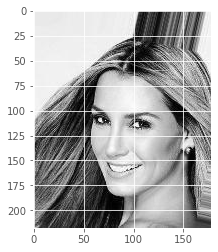

In [56]:
import random
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
img_folder ='C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Celebrity/img_align_celeba/img_align_celeba/'
for img in os.listdir(img_folder):
    image_array = cv2.imread(os.path.join(img_folder, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(image_array,cmap = "gray")
    plt.show()
    break
    

In [57]:
image_array.shape

(218, 178)

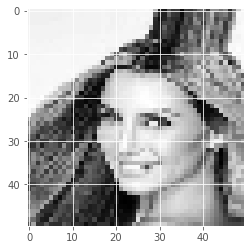

In [58]:
imgsize = 50
new_array = cv2.resize(image_array, (imgsize, imgsize))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [65]:

def data_creation(x):
    created_data = []
    imgsize = x
    start_time = time.time()
    j = 0
    class_num = celebData['Male']
    for img in os.listdir(img_folder):
        image_array = cv2.imread(os.path.join(img_folder, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(image_array, (imgsize, imgsize))
        created_data.append([new_array,class_num[j]])
        j = j+1
        if (j) % 10000 == 0:
            print ('Another 10000')
            print("--- %s seconds ---" % (time.time() - start_time))
    return created_data



# Creating and saving 100x100 data

In [66]:
from numpy import asarray
from numpy import savetxt
import random
imgsize = 100
created_data = data_creation(imgsize)
random.shuffle(created_data)
#Change variables from -1 and 1 to 0 and 1
for i in range(len(created_data)):
    if created_data[i][1] == -1:
        created_data[i][1] = 0
X = []
y = []
#Assign features and label to new variables
for features, gender in created_data:
    X.append(features)
    y.append(gender)
#Reshape for our models    
X = np.array(X).reshape(-1, imgsize, imgsize, 1)
#Save to directory
np.save('datacelebX', X)
np.save('datacelebY',y)

Another 10000
--- 9.62438416481018 seconds ---
Another 10000
--- 18.833142280578613 seconds ---
Another 10000
--- 28.1617910861969 seconds ---
Another 10000
--- 38.09447526931763 seconds ---
Another 10000
--- 48.21751284599304 seconds ---
Another 10000
--- 58.99559259414673 seconds ---
Another 10000
--- 70.07610869407654 seconds ---
Another 10000
--- 81.66097974777222 seconds ---
Another 10000
--- 93.70873165130615 seconds ---
Another 10000
--- 103.7013807296753 seconds ---
Another 10000
--- 116.43045902252197 seconds ---
Another 10000
--- 128.8090877532959 seconds ---
Another 10000
--- 141.17940735816956 seconds ---
Another 10000
--- 153.26932382583618 seconds ---
Another 10000
--- 165.29276704788208 seconds ---
Another 10000
--- 177.28899931907654 seconds ---
Another 10000
--- 189.31125235557556 seconds ---
Another 10000
--- 201.4244191646576 seconds ---
Another 10000
--- 211.42787885665894 seconds ---
Another 10000
--- 223.53772044181824 seconds ---


# Creating and saving 50x50 data

In [67]:
imgsize = 50
created_data = data_creation(imgsize)
random.shuffle(created_data)

for i in range(len(created_data)):
    if created_data[i][1] == -1:
        created_data[i][1] = 0
X = []
y = []

for features, gender in created_data:
    X.append(features)
    y.append(gender)
    
X = np.array(X).reshape(-1, imgsize, imgsize, 1)
np.save('datacelebX50', X)
np.save('datacelebY50',y)

Another 10000
--- 8.840603828430176 seconds ---
Another 10000
--- 17.872315645217896 seconds ---
Another 10000
--- 27.0949547290802 seconds ---
Another 10000
--- 36.964396953582764 seconds ---
Another 10000
--- 47.16087889671326 seconds ---
Another 10000
--- 57.770405292510986 seconds ---
Another 10000
--- 67.07567262649536 seconds ---
Another 10000
--- 78.32751536369324 seconds ---
Another 10000
--- 90.00358510017395 seconds ---
Another 10000
--- 102.20796132087708 seconds ---
Another 10000
--- 113.80161190032959 seconds ---
Another 10000
--- 119.96671724319458 seconds ---
Another 10000
--- 126.17216324806213 seconds ---
Another 10000
--- 132.49126768112183 seconds ---
Another 10000
--- 139.10882687568665 seconds ---
Another 10000
--- 150.33722138404846 seconds ---
Another 10000
--- 161.51583218574524 seconds ---
Another 10000
--- 172.73198795318604 seconds ---
Another 10000
--- 182.34753131866455 seconds ---
Another 10000
--- 193.4169020652771 seconds ---


In [69]:
#load into environment, replace with 'datacelebX50' or 'datacelebY50' or whatever you saved the file as above.
X = np.load('datacelebX.npy')
y = np.load('datacelebY.npy')

In [70]:
X.shape

(202599, 100, 100, 1)

In [71]:
type(y)

numpy.ndarray

# Convolution Neural Network

In [82]:
#This Model was trained with 100x100 Resolution, 10 epochs and learning rate of 0.001
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
X = np.load('datacelebX.npy')
y = np.load('datacelebY.npy')
X = X/255.0 #255 is normalizing constant for grayscale
y = np.array(y)
model10010e = Sequential()
model10010e.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model10010e.add(Activation("relu"))
model10010e.add(MaxPooling2D(pool_size = (2,2)))
model10010e.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model10010e.add(Activation("relu"))
model10010e.add(MaxPooling2D(pool_size = (2,2)))
model10010e.add(Flatten())
model10010e.add(Dense(64))
model10010e.add(Dense(1))
model10010e.add(Activation("sigmoid"))
model10010e.compile(loss = "binary_crossentropy", optimizer = "adam",metrics=['accuracy'])
#Batch size is 100, training size is 162,500, 
Model10010e = model10010e.fit(X,y, batch_size=1000,epochs = 10,validation_split = 0.20)

Epoch 1/10
163/163 [==============================] - 1240s 7s/step - loss: 0.4178 - accuracy: 0.8216 - val_loss: 0.1940 - val_accuracy: 0.9263
Epoch 2/10
163/163 [==============================] - 1196s 7s/step - loss: 0.1700 - accuracy: 0.9352 - val_loss: 0.1616 - val_accuracy: 0.9379
Epoch 3/10
163/163 [==============================] - 1192s 7s/step - loss: 0.1398 - accuracy: 0.9475 - val_loss: 0.1311 - val_accuracy: 0.9508
Epoch 4/10
163/163 [==============================] - 1192s 7s/step - loss: 0.1242 - accuracy: 0.9532 - val_loss: 0.1254 - val_accuracy: 0.9532
Epoch 5/10
163/163 [==============================] - 1192s 7s/step - loss: 0.1111 - accuracy: 0.9583 - val_loss: 0.1128 - val_accuracy: 0.9577
Epoch 6/10
163/163 [==============================] - 1192s 7s/step - loss: 0.1020 - accuracy: 0.9619 - val_loss: 0.1117 - val_accuracy: 0.9576
Epoch 7/10
163/163 [==============================] - 1191s 7s/step - loss: 0.0961 - accuracy: 0.9641 - val_loss: 0.1064 - val_accuracy:

In [79]:
#This model was trained with 50x50 resolution, 10 epochs and learning rate 0.001.
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = X/255.0
y = np.array(y)
model10e = Sequential()
model10e.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model10e.add(Activation("relu"))
model10e.add(MaxPooling2D(pool_size = (2,2)))
model10e.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model10e.add(Activation("relu"))
model10e.add(MaxPooling2D(pool_size = (2,2)))
model10e.add(Flatten())
model10e.add(Dense(64))
model10e.add(Dense(1))
model10e.add(Activation("sigmoid"))
model10e.compile(loss = "binary_crossentropy", optimizer = "adam",metrics=['accuracy'])
#Batch size is 1000, training size is 162,500, 
#Train Model
Model10e = model10e.fit(X,y, batch_size=1000,epochs = 10,validation_split = 0.20)

Epoch 1/10
163/163 [==============================] - 254s 2s/step - loss: 0.3853 - accuracy: 0.8136 - val_loss: 0.2305 - val_accuracy: 0.9101
Epoch 2/10
163/163 [==============================] - 255s 2s/step - loss: 0.1804 - accuracy: 0.9306 - val_loss: 0.1938 - val_accuracy: 0.9240
Epoch 3/10
163/163 [==============================] - 254s 2s/step - loss: 0.1441 - accuracy: 0.9450 - val_loss: 0.1467 - val_accuracy: 0.9437
Epoch 4/10
163/163 [==============================] - 255s 2s/step - loss: 0.1260 - accuracy: 0.9519 - val_loss: 0.1255 - val_accuracy: 0.9526
Epoch 5/10
163/163 [==============================] - 257s 2s/step - loss: 0.1138 - accuracy: 0.9566 - val_loss: 0.1194 - val_accuracy: 0.9552
Epoch 6/10
163/163 [==============================] - 255s 2s/step - loss: 0.1068 - accuracy: 0.9591 - val_loss: 0.1167 - val_accuracy: 0.9565
Epoch 7/10
163/163 [==============================] - 257s 2s/step - loss: 0.0998 - accuracy: 0.9623 - val_loss: 0.1312 - val_accuracy: 0.9501

In [78]:
#This Model was trained with 100x100 Resolution and learning rate of 0.001
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
X = np.load('datacelebX.npy')
y = np.load('datacelebY.npy')
X = X/255.0 #255 is normalizing constant for grayscale
y = np.array(y)
model100 = Sequential()
model100.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model100.add(Activation("relu"))
model100.add(MaxPooling2D(pool_size = (2,2)))
model100.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model100.add(Activation("relu"))
model100.add(MaxPooling2D(pool_size = (2,2)))
model100.add(Flatten())
model100.add(Dense(64))
model100.add(Dense(1))
model100.add(Activation("sigmoid"))
model100.compile(loss = "binary_crossentropy", optimizer = "adam",metrics=['accuracy'])
#Batch size is 500, training size is 162,500, 
Model100 = model100.fit(X,y, batch_size=500,epochs = 3,validation_split = 0.20)

Epoch 1/3
325/325 [==============================] - 1225s 4s/step - loss: 0.2501 - accuracy: 0.8920 - val_loss: 0.1756 - val_accuracy: 0.9299
Epoch 2/3
325/325 [==============================] - 1202s 4s/step - loss: 0.1242 - accuracy: 0.9531 - val_loss: 0.1126 - val_accuracy: 0.9581
Epoch 3/3
325/325 [==============================] - 1194s 4s/step - loss: 0.1030 - accuracy: 0.9613 - val_loss: 0.1064 - val_accuracy: 0.9600


In [72]:
#This model was trained with 50x50 resolution and learning rate 0.001.
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = X/255.0
y = np.array(y)
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam",metrics=['accuracy'])
#Batch size is 1000, training size is 162,500, 
#Train Model
Model = model.fit(X,y, batch_size=1000,epochs = 3,validation_split = 0.20)

Epoch 1/3
163/163 [==============================] - 270s 2s/step - loss: 0.3420 - accuracy: 0.8398 - val_loss: 0.1971 - val_accuracy: 0.9236
Epoch 2/3
163/163 [==============================] - 271s 2s/step - loss: 0.1670 - accuracy: 0.9360 - val_loss: 0.1590 - val_accuracy: 0.9393
Epoch 3/3
163/163 [==============================] - 272s 2s/step - loss: 0.1401 - accuracy: 0.9464 - val_loss: 0.1381 - val_accuracy: 0.9471


In [72]:
#This model was trained with 50x50 resolution and a learning rate of 0.01.
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = X/255.0
y = np.array(y)
#change of learning rate from default 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

modellr = Sequential()
modellr.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
modellr.add(Activation("relu"))
modellr.add(MaxPooling2D(pool_size = (2,2)))
modellr.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
modellr.add(Activation("relu"))
modellr.add(MaxPooling2D(pool_size = (2,2)))
modellr.add(Flatten())
modellr.add(Dense(64))
modellr.add(Dense(1))
modellr.add(Activation("sigmoid"))
modellr.compile(loss = "binary_crossentropy", optimizer = optimizer,
                metrics=['accuracy'])
#Batch size is 1000, training size is 162,500, 
#Train Model
Modellr = modellr.fit(X,y, batch_size=1000,epochs = 3,validation_split = 0.20)

Epoch 1/3
163/163 [==============================] - 264s 2s/step - loss: 0.6275 - accuracy: 0.7697 - val_loss: 0.2927 - val_accuracy: 0.8829
Epoch 2/3
163/163 [==============================] - 263s 2s/step - loss: 0.2251 - accuracy: 0.9105 - val_loss: 0.2354 - val_accuracy: 0.9027
Epoch 3/3
163/163 [==============================] - 266s 2s/step - loss: 0.2004 - accuracy: 0.9209 - val_loss: 0.2287 - val_accuracy: 0.9090


In [27]:
#This model was trained with 50x50 resolution and learning rate 0.001 and a softmax activation function for output layer.
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = X/255.0
y = np.array(y)
modelsf = Sequential()
modelsf.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
modelsf.add(Activation("relu"))
modelsf.add(MaxPooling2D(pool_size = (2,2)))
modelsf.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
modelsf.add(Activation("relu"))
modelsf.add(MaxPooling2D(pool_size = (2,2)))
modelsf.add(Flatten())
modelsf.add(Dense(64))
modelsf.add(Dense(1))
modelsf.add(Activation("softmax"))
modelsf.compile(loss = "binary_crossentropy", optimizer = "adam",metrics=['accuracy'])
#Batch size is 1000, training size is 162,500, 
#Train Model
Modelsf = modelsf.fit(X,y, batch_size=1000,epochs = 3,validation_split = 0.20)

Epoch 1/3
163/163 [==============================] - 259s 2s/step - loss: 0.3653 - accuracy: 0.4165 - val_loss: 0.2332 - val_accuracy: 0.4177
Epoch 2/3
163/163 [==============================] - 260s 2s/step - loss: 0.1812 - accuracy: 0.4165 - val_loss: 0.1911 - val_accuracy: 0.4177
Epoch 3/3
163/163 [==============================] - 272s 2s/step - loss: 0.1485 - accuracy: 0.4165 - val_loss: 0.1396 - val_accuracy: 0.4177


Saving the models for future use.

In [73]:
model.save('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/')

INFO:tensorflow:Assets written to: C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/assets


In [11]:
model100.save('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model100')

INFO:tensorflow:Assets written to: C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model100\assets


INFO:tensorflow:Assets written to: C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model100\assets


In [ ]:
modellr.save('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/modellr')

In [80]:
model10e.save('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model10e')

INFO:tensorflow:Assets written to: C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model10e\assets


In [88]:
model10010e.save('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model10010e')

INFO:tensorflow:Assets written to: C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model10010e\assets


Loading model trained on 50x50 images

In [2]:
import keras

In [74]:
model = keras.models.load_model('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/')

Loading model trained on 100x100 images

In [3]:
model100 = keras.models.load_model('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model100')

In [75]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_13 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7744)             

In [73]:
modellr.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_9 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7744)             

In [64]:
model100.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 98, 98, 64)        0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 98, 98, 64)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 49, 49, 64)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 47, 47, 64)        0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 47, 47, 64)        0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

Text(0.5, 1.0, 'Accuracy of Model trained on 100x100 images and 10 epochs')

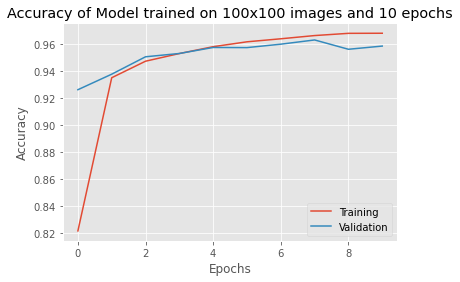

In [84]:
plt.plot(Model10010e.history['accuracy'])
plt.plot(Model10010e.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of Model trained on 100x100 images and 10 epochs")

Text(0.5, 1.0, 'Accuracy of Model trained on 50x50 images and 10 epochs')

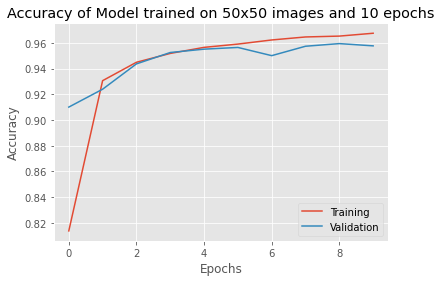

In [81]:
plt.plot(Model10e.history['accuracy'])
plt.plot(Model10e.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of Model trained on 50x50 images and 10 epochs")

Text(0.5, 1.0, 'Accuracy of Model trained on 100x100 images')

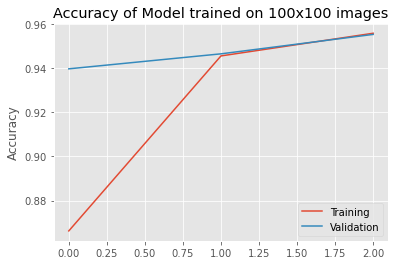

In [82]:
#Model Accuracy Graphs
plt.plot(Model100.history['accuracy'])
plt.plot(Model100.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of Model trained on 100x100 images")

Text(0.5, 1.0, 'Accuracy of Model trained on 50x50 images')

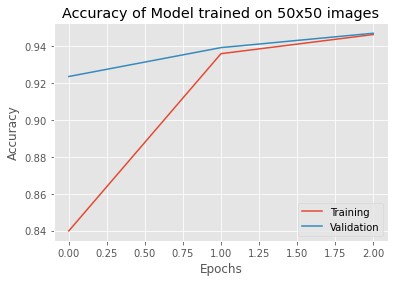

In [76]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of Model trained on 50x50 images")

Text(0.5, 1.0, 'Accuracy of Model trained on 50x50 images and LR = 0.01')

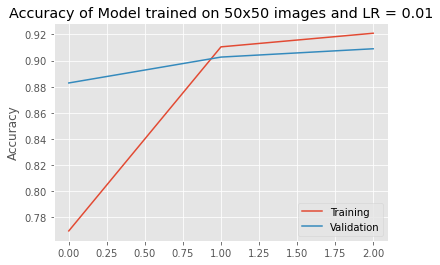

In [74]:
plt.plot(Modellr.history['accuracy'])
plt.plot(Modellr.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of Model trained on 50x50 images and LR = 0.01")

Text(0.5, 1.0, 'Loss of Model trained on 100x100 images and 10 epochs')

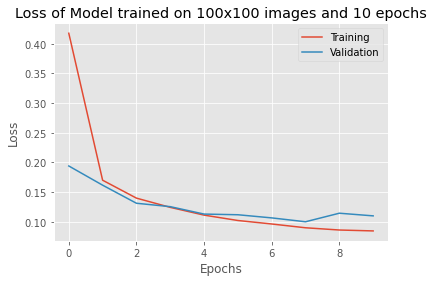

In [86]:
plt.plot(Model10010e.history['loss'])
plt.plot(Model10010e.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'upper right')
plt.title("Loss of Model trained on 100x100 images and 10 epochs")

Text(0.5, 1.0, 'Loss of Model trained on 50x50 images and 10 epochs')

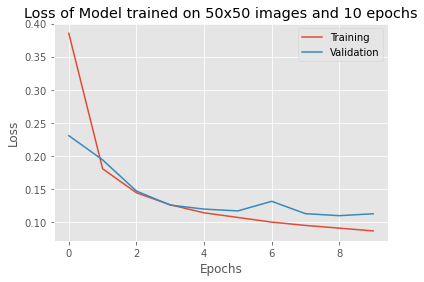

In [87]:
plt.plot(Model10e.history['loss'])
plt.plot(Model10e.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'upper right')
plt.title("Loss of Model trained on 50x50 images and 10 epochs")

Text(0.5, 1.0, 'Loss of Model trained on 100x100 images')

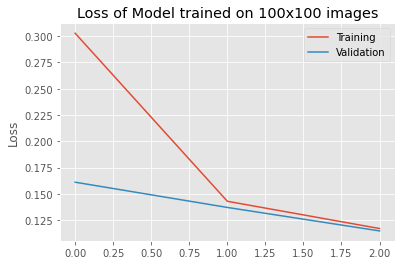

In [76]:
plt.plot(Model100.history['loss'])
plt.plot(Model100.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'upper right')
plt.title("Loss of Model trained on 100x100 images")


Text(0.5, 1.0, 'Loss of Model trained on 50x50 images')

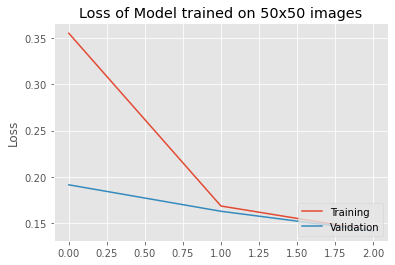

In [83]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'upper right')
plt.title("Loss of Model trained on 50x50 images")

Text(0.5, 1.0, 'Loss of Model trained on 50x50 images with LR = 0.01')

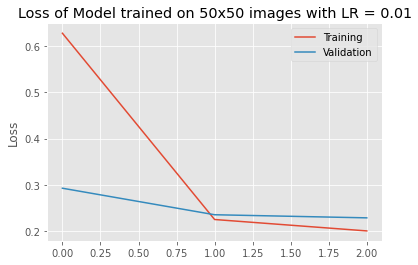

In [75]:
plt.plot(Modellr.history['loss'])
plt.plot(Modellr.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'upper right')
plt.title("Loss of Model trained on 50x50 images with LR = 0.01")


Although our model is very accurate, due to the large number of data we are feeding into the Convolution Neural Network, we may be overfitting our model with the training data given to it. In order to combat this overfitting, we must introduce regularization to our model. 

# Let's try L1 regularization for our CNN

Since there was only slight differences in accuracy for our models trained on 50x50 and 100x100 images, we will use the 50x50 datasets 'datacelebX50.npy' and 'datacelebY50.npy'. 

In [82]:
#This model was trained with 50x50 resolution.
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = X/255.0
y = np.array(y)
model50L1 = Sequential()
#Layer 1
model50L1.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model50L1.add(Activation("relu"))
model50L1.add(MaxPooling2D(pool_size = (2,2)))
#Layer 2
model50L1.add(Conv2D(64, (3,3), input_shape = X.shape[1:],kernel_regularizer =tf.keras.regularizers.l1(l=0.01)))
model50L1.add(Activation("relu"))
model50L1.add(MaxPooling2D(pool_size = (2,2)))
model50L1.add(Flatten())
#Layer 3
model50L1.add(Dense(64,kernel_regularizer =tf.keras.regularizers.l1(l=0.01)))
#Layer 4
model50L1.add(Dense(1))
model50L1.add(Activation("sigmoid"))
model50L1.compile(loss = "binary_crossentropy", optimizer = "adam",metrics=['accuracy'])
#Batch size is 512, training size is 162,500, 
#Train Model
Model50L1 = model50L1.fit(X,y, batch_size=1000,epochs = 5,validation_split = 0.20)

Epoch 1/5
163/163 [==============================] - 254s 2s/step - loss: 8.2905 - accuracy: 0.5811 - val_loss: 1.3404 - val_accuracy: 0.5823
Epoch 2/5
163/163 [==============================] - 252s 2s/step - loss: 1.3302 - accuracy: 0.5835 - val_loss: 1.3320 - val_accuracy: 0.5823
Epoch 3/5
163/163 [==============================] - 253s 2s/step - loss: 1.3283 - accuracy: 0.5835 - val_loss: 1.3217 - val_accuracy: 0.5823
Epoch 4/5
163/163 [==============================] - 252s 2s/step - loss: 1.3247 - accuracy: 0.5835 - val_loss: 1.3200 - val_accuracy: 0.5823
Epoch 5/5
163/163 [==============================] - 266s 2s/step - loss: 1.3225 - accuracy: 0.5835 - val_loss: 1.3202 - val_accuracy: 0.5823


# Let's try L2 regularization for our CNN

In [66]:
#This model was trained with 50x50 resolution.
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = X/255.0
y = np.array(y)
model50L2 = Sequential()
#Layer 1
model50L2.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model50L2.add(Activation("relu"))
model50L2.add(MaxPooling2D(pool_size = (2,2)))
#Layer 2
model50L2.add(Conv2D(64, (3,3), input_shape = X.shape[1:],kernel_regularizer =tf.keras.regularizers.l2(l=0.01)))
model50L2.add(Activation("relu"))
model50L2.add(MaxPooling2D(pool_size = (2,2)))
model50L2.add(Flatten())
#Layer 3
model50L2.add(Dense(64,kernel_regularizer =tf.keras.regularizers.l2(l=0.01)))
#Layer 4
model50L2.add(Dense(1))
model50L2.add(Activation("sigmoid"))
model50L2.compile(loss = "binary_crossentropy", optimizer = "adam",metrics=['accuracy'])
#Batch size is 512, training size is 162,500, 
#Train Model
Model50L2 = model50L2.fit(X,y, batch_size=1000,epochs = 5,validation_split = 0.20)

Epoch 1/5
163/163 [==============================] - 251s 2s/step - loss: 0.6775 - accuracy: 0.8101 - val_loss: 0.3681 - val_accuracy: 0.9027
Epoch 2/5
163/163 [==============================] - 255s 2s/step - loss: 0.3366 - accuracy: 0.9058 - val_loss: 0.4095 - val_accuracy: 0.8446
Epoch 3/5
163/163 [==============================] - 249s 2s/step - loss: 0.2974 - accuracy: 0.9149 - val_loss: 0.2933 - val_accuracy: 0.9146
Epoch 4/5
163/163 [==============================] - 250s 2s/step - loss: 0.2789 - accuracy: 0.9194 - val_loss: 0.2603 - val_accuracy: 0.9267
Epoch 5/5
163/163 [==============================] - 250s 2s/step - loss: 0.2580 - accuracy: 0.9264 - val_loss: 0.3020 - val_accuracy: 0.9038


In [90]:
model50L1.save('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Model50L1')

INFO:tensorflow:Assets written to: C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Model50L1\assets


In [91]:
model50L2.save('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Model50L2')

INFO:tensorflow:Assets written to: C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Model50L2\assets


# Accuracy and Loss of L1 vs L2 CNN models.

Text(0.5, 1.0, 'Accuracy of Model trained with L1 Regularization')

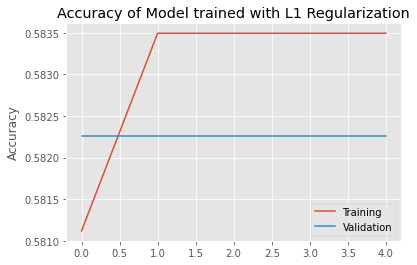

In [83]:
plt.plot(Model50L1.history['accuracy'])
plt.plot(Model50L1.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of Model trained with L1 Regularization")

Text(0.5, 1.0, 'Loss of Model trained with L1 Regularization')

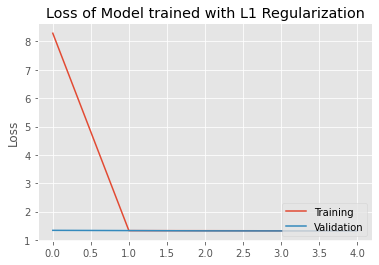

In [84]:
plt.plot(Model50L1.history['loss'])
plt.plot(Model50L1.history['val_loss'])
plt.ylabel("Loss")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Loss of Model trained with L1 Regularization")

Text(0.5, 1.0, 'Accuracy of Model trained with L2 Regularization')

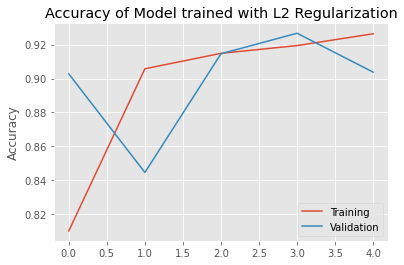

In [85]:
plt.plot(Model50L2.history['accuracy'])
plt.plot(Model50L2.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of Model trained with L2 Regularization")

Text(0.5, 1.0, 'Loss of Model trained with L2 Regularization')

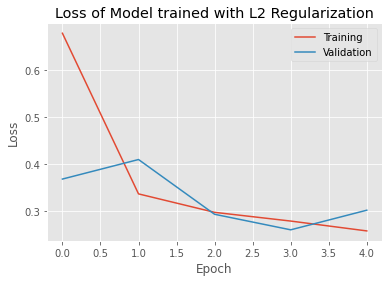

In [81]:
plt.plot(Model50L2.history['loss'])
plt.plot(Model50L2.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc = 'upper right')
plt.title("Loss of Model trained with L2 Regularization")

As we can see above, the difference in accuracy and loss in both models are substantial. The CNN model trained with L1 regularization (Lasso Regression) is very inaccurate with test data, due to the sparse nature that L1 regularization introduces to the parameters of the model. The CNN model trained with L2 regularization is much higher in accuracy, yet lower than the Neural Networks we trained without the regularization which is expected. We do not want our model to be too overfit to the data because we know that the model has bias towards younger women due to the fact that it has more samples of 'young' and 'female'. 

# Recurrent Neural Network on 50x50 images

In [30]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = np.squeeze(X)
X = X/255.0
modelRNN = Sequential()
modelRNN.add(LSTM(64, input_shape=(50,50), activation='relu', return_sequences=True))
modelRNN.add(Dropout(0.2))

modelRNN.add(LSTM(64, activation='relu'))
modelRNN.add(Dropout(0.1))

modelRNN.add(Dense(64, activation='relu'))
modelRNN.add(Dropout(0.2))

modelRNN.add(Dense(10, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

modelRNN.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

history = modelRNN.fit(X,
          y,
          batch_size = 1000,
          epochs=5,
          validation_split=0.20)

test_loss, test_acc = modelRNN.evaluate(X, y)

C:\Users\Cindy\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/5
163/163 [==============================] - 64s 376ms/step - loss: 0.7876 - accuracy: 0.6469 - val_loss: 0.5410 - val_accuracy: 0.7238
Epoch 2/5
163/163 [==============================] - 58s 356ms/step - loss: 0.5223 - accuracy: 0.7414 - val_loss: 0.4837 - val_accuracy: 0.7696
Epoch 3/5
163/163 [==============================] - 58s 359ms/step - loss: 0.4562 - accuracy: 0.7871 - val_loss: 0.4458 - val_accuracy: 0.7892
Epoch 4/5
163/163 [==============================] - 60s 370ms/step - loss: 0.4110 - accuracy: 0.8141 - val_loss: 0.5246 - val_accuracy: 0.7407
Epoch 5/5
6332/6332 [==============================] - 95s 15ms/step - loss: 0.3372 - accuracy: 0.8511


In [ ]:
modelRNN.summary()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training','Validation'], loc = 'lower right')
plt.title("Accuracy of RNN model trained on 50x50 images")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")
plt.legend(['Training','Validation'], loc = 'upper right')
plt.title("Loss of RNN model trained on 50x50 images")

# Below are tests done with the CNN model trained with 100x100 images and 10 epochs

84.58 % likely to be a male


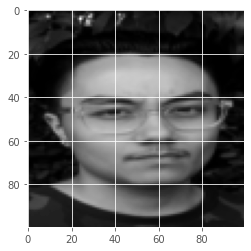

In [97]:
#A picture of me, Mason! :D
model10010e = keras.models.load_model('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model10010e')

imgsize = 100
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/selfie.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

82.77 % likely to be a male


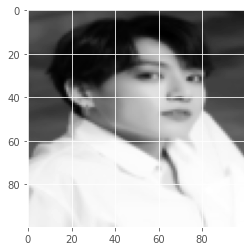

In [91]:
#A picture of Jungkook, young male. 
imgsize = 100
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/jungkook.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

91.78 % likely to be a male


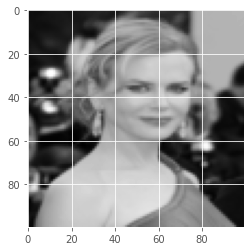

In [92]:
#A picture of Nicole Kidman,middle aged female.
imgsize = 100
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/nicole.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

18.19 % likely to be a male


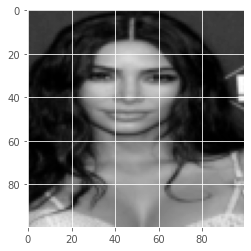

In [89]:
#A picture of Kim Kardashian, middle aged female.
imgsize = 100
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kimk.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

99.7 % likely to be a male


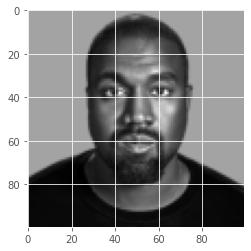

In [93]:
#A picture of Kanye West, middle aged male.
imgsize = 100
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kanye.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

19.85 % likely to be a male


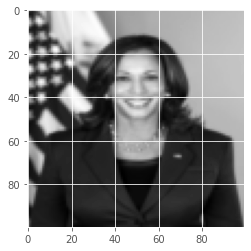

In [94]:
#A picture of Kamala Harris, middle aged female.
imgsize = 100
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kamala.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

99.98 % likely to be a male


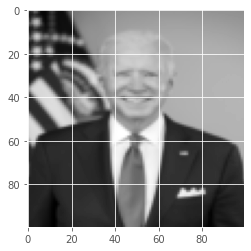

In [95]:
#A picture of Joe Biden, old male.
imgsize = 100
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/joe.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

97.74 % likely to be a male


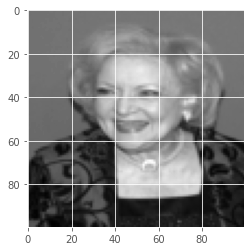

In [96]:
#A picture of Betty White, old female.
imgsize = 100
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/betty.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model10010e.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

# Model trained on 100x100 images and 3 epochs.

82.12 % likely to be a male


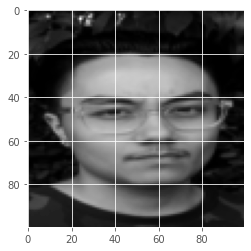

In [49]:
model100 = keras.models.load_model('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/model100')

imgsize = 100
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/selfie.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      


96.7 % likely to be a male


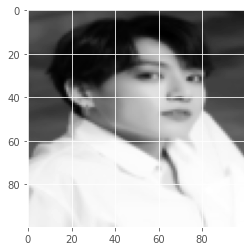

In [50]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/jungkook.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')


69.84 % likely to be a male


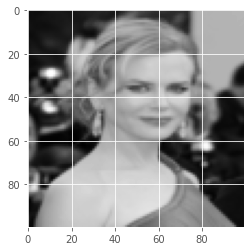

In [20]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/nicole.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      


61.48 % likely to be a male


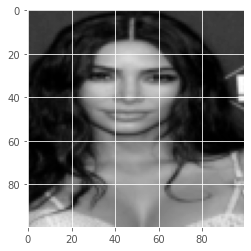

In [21]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kimk.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

99.59 % likely to be a male


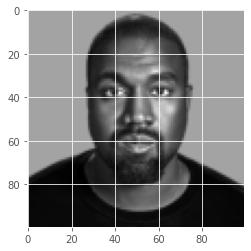

In [22]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kanye.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

5.1 % likely to be a male


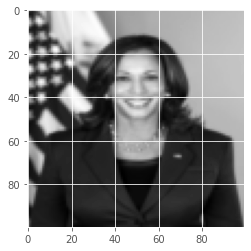

In [23]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kamala.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      



99.87 % likely to be a male


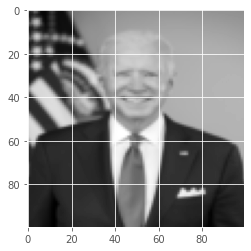

In [24]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/joe.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')


Image from test data below

0.49 % likely to be a male


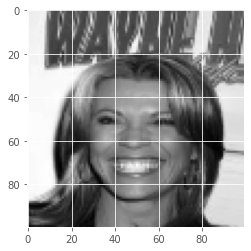

In [51]:
#This image comes from our dataset, and the probability is much more extreme of being a female. 
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Celebrity/img_align_celeba/img_align_celeba/193100.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model100.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      


# Below are tests done on CNN model trained with 50x50 images.

98.05 % likely to be a male


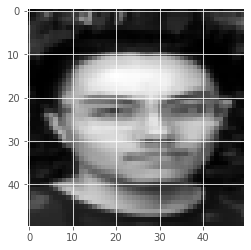

In [32]:
from skimage.transform import resize
model = keras.models.load_model('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/')

imgsize = 50
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/selfie.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

92.33 % likely to be a male


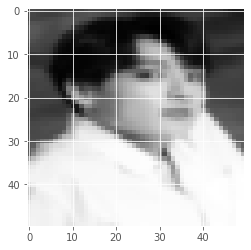

In [33]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/jungkook.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

58.07 % likely to be a male


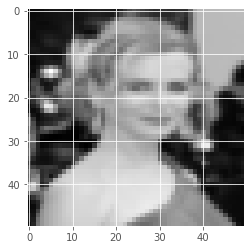

In [10]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/nicole.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

79.38 % likely to be a male


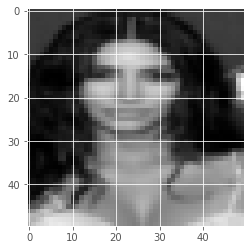

In [34]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kimk.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

98.94 % likely to be a male


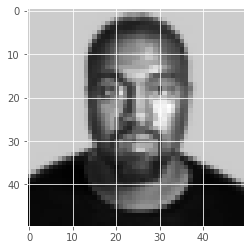

In [35]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kanye.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      


58.97 % likely to be a male


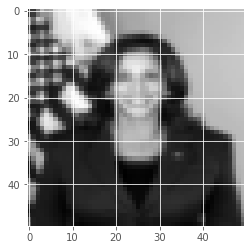

In [36]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kamala.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

99.7 % likely to be a male


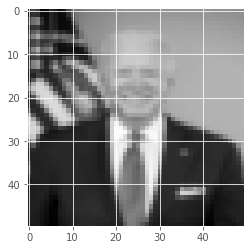

In [37]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/joe.jpg')

from skimage.transform import resize
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

# Below is the CNN trained with L2 Regularization

96.56 % likely to be a male


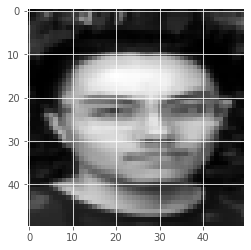

In [11]:
model50L2 = keras.models.load_model('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/Model50L2')

imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/selfie.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model50L2.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

93.43 % likely to be a male


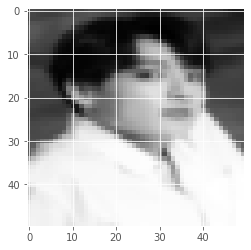

In [12]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/jungkook.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model50L2.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      


90.88 % likely to be a male


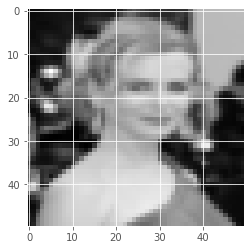

In [13]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/nicole.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model50L2.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

81.32 % likely to be a male


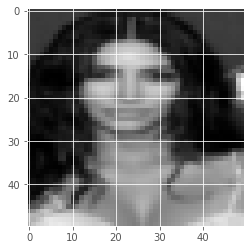

In [14]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kimk.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model50L2.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

98.8 % likely to be a male


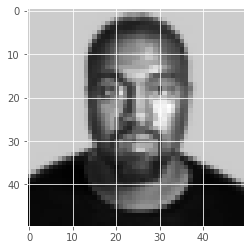

In [15]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kanye.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model50L2.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

32.08 % likely to be a male


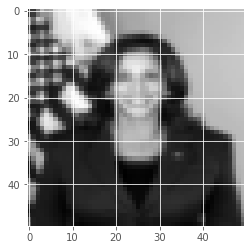

In [16]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/kamala.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model50L2.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

88.52 % likely to be a male


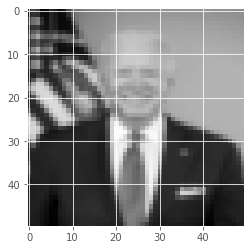

In [17]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/joe.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = model50L2.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')
      

The L2 Regularization added to our Convolutional Neural Network shows better results for the image of Kamala Harris, but performs worse with the images of younger women such as Kim Kardashian and Nicole Kidman. In the model without regularization, the model leans more towards categorizing the previous two mentioned celebrities' images as female, with the lower probability of them being male. 

# Testing RNN model trained with 50 x 50 images

In [ ]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Lenovo/Desktop/kamala.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = modelRNN.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

In [ ]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Lenovo/Desktop/kim.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = modelRNN.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

In [ ]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Lenovo/Desktop/000019.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = modelRNN.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

In [ ]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Lenovo/Desktop/kanye.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = modelRNN.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

In [ ]:
imgsize = 50
from skimage.transform import resize
selfie = plt.imread('C:/Users/Lenovo/Desktop/margot.jpg')
resized_selfie = resize(selfie, (imgsize,imgsize,1))
img = plt.imshow(resized_selfie, cmap = 'gray')
predictions = modelRNN.predict(np.array([resized_selfie]))
print(round(predictions[0][0].astype(float)*100,2),'% likely to be a male')

# Logistic Regression on 100x100 images

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#On 100x100 images
X = np.load('datacelebX.npy')
y = np.load('datacelebY.npy')
X = np.reshape(X, (202599,10000))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

logreg = LogisticRegression(random_state=15).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))

C:\Users\Cindy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9144866732477789


[[0.4979007 0.5020993]]


C:\Users\Cindy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


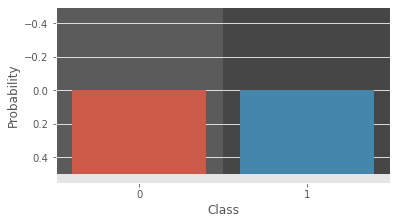

In [54]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/joe.jpg')
imgsize = 100
resized_selfie = resize(selfie, (imgsize,imgsize,1))
resized_selfie = np.array([resized_selfie])
resized_selfie = np.reshape(resized_selfie, (1,10000))
img = plt.imshow(resized_selfie, cmap = 'gray')
test_probs = logreg.predict_proba(resized_selfie)
print(test_probs)


# Logistic regression on 50x50 images. 

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#On 50x50 images
X = np.load('datacelebX50.npy')
y = np.load('datacelebY50.npy')
X = np.reshape(X, (202599,2500))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
scalerX = preprocessing.StandardScaler().fit(X_train)
logreg50 = LogisticRegression(random_state=15).fit(X_train, y_train)
y_pred50 = logreg50.predict(X_test)
print(logreg50.score(X_test, y_test))

C:\Users\Cindy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9076258637709773


[[0.49843967 0.50156033]]


C:\Users\Cindy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


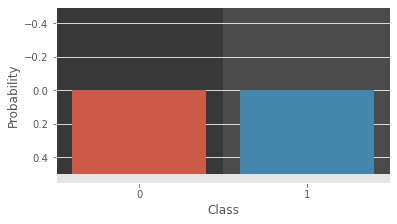

In [60]:
selfie = plt.imread('C:/Users/Cindy/Desktop/Spring Quarter 2021/STA 141C/joe.jpg')
imgsize = 50
resized_selfie = resize(selfie, (imgsize,imgsize,1))
resized_selfie = np.array([resized_selfie])
resized_selfie = np.reshape(resized_selfie, (1,2500))
img = plt.imshow(resized_selfie, cmap = 'gray')
test_probs = logreg50.predict_proba(resized_selfie)
print(test_probs)

# Factors that may influence our models

The data given to us had 41 attributes listed of each celebrity image, with categories such as "narrow eyes", "beard", "receding hairline" that vastly influences the model due to the fact that each of these categories had very few or very high counts. This explains the nature in which the model can identify males more confidently than females, as patterns like baldness and beards can influence the model's parameters. Without RGB images, the model cannot identify lipstick, eyeliner or makeup in general as a very strong indicator of a woman. Greyscale limits the model to only identifying patterns such as edges, shapes and color from white to black. 